<a href="https://colab.research.google.com/github/pbarizza/ML-course-2025/blob/main/lesson02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [10]:
advertising = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/lesson-01/advertising.csv')
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

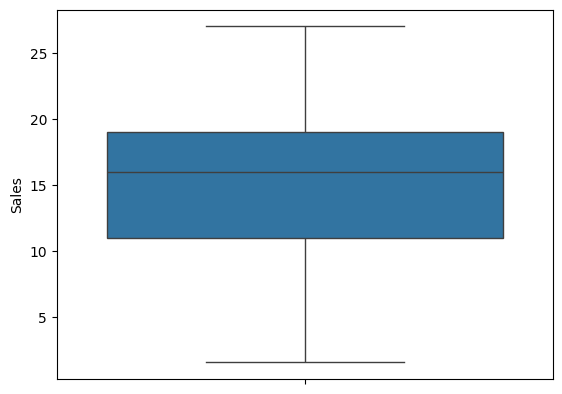

In [13]:
sns.boxplot(advertising['Sales'])
plt.show()

In [14]:

print(advertising['Sales'].describe())

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64


<Axes: ylabel='TV'>

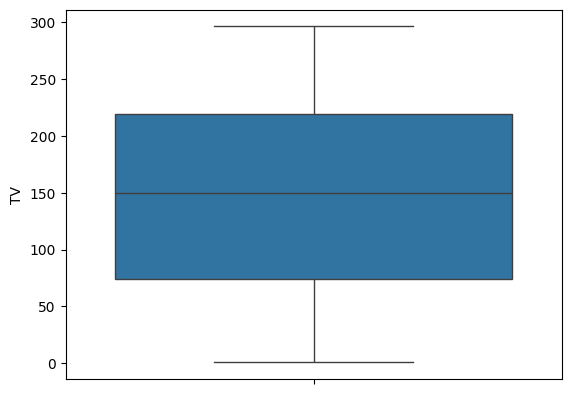

In [15]:
sns.boxplot(advertising['TV'])


<Axes: ylabel='Radio'>

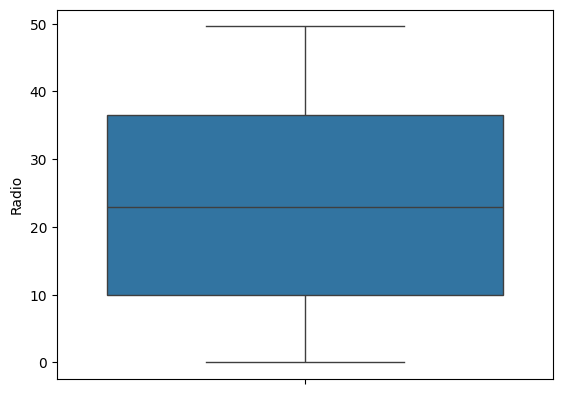

In [16]:
sns.boxplot(advertising['Radio'])


<Axes: ylabel='Newspaper'>

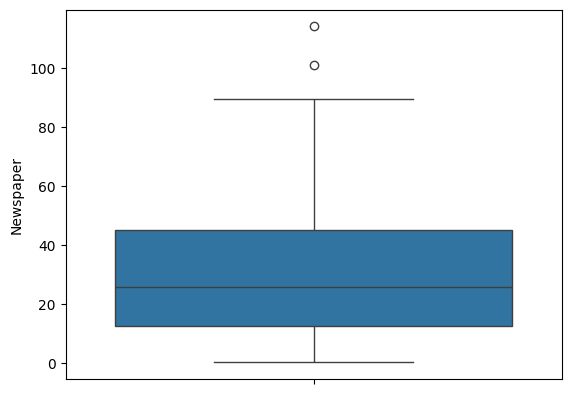

In [17]:
sns.boxplot(advertising['Newspaper'])

In [35]:
Q1_news = advertising['Newspaper'].quantile(0.25)
Q3_news = advertising['Newspaper'].quantile(0.75)
IQR_news = Q3_news - Q1_news
lower_news = Q1 - 1.5*IQR
upper_news = Q3 + 1.5*IQR
box_data_news = pd.DataFrame([Q1_news, Q3_news, IQR_news, lower_news, upper_news])
outliers_news = advertising[(advertising['Newspaper'] < lower_news) | (advertising['Newspaper'] > upper_news)]
print(outliers_news['Newspaper'])
box_data_news



16     114.0
101    100.9
Name: Newspaper, dtype: float64


,0
0,12.750
1,45.100
2,32.350
3,-35.775
4,93.625


In [34]:
advertising.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


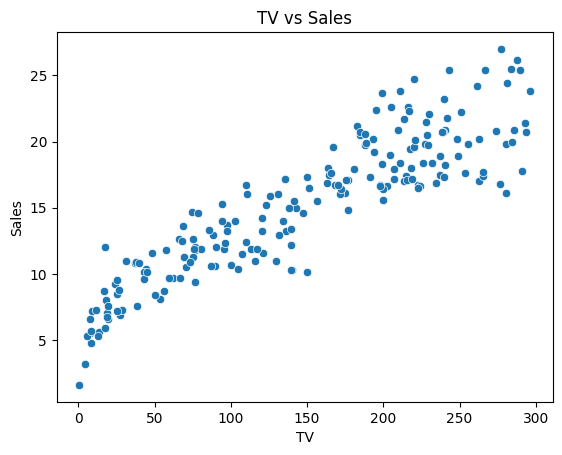

In [42]:
#plt.scatter(advertising['TV'], advertising['Sales'])
#plt.show()

sns.scatterplot(x=advertising['TV'], y=advertising['Sales'], data=advertising)
plt.title('TV vs Sales')
plt.show()

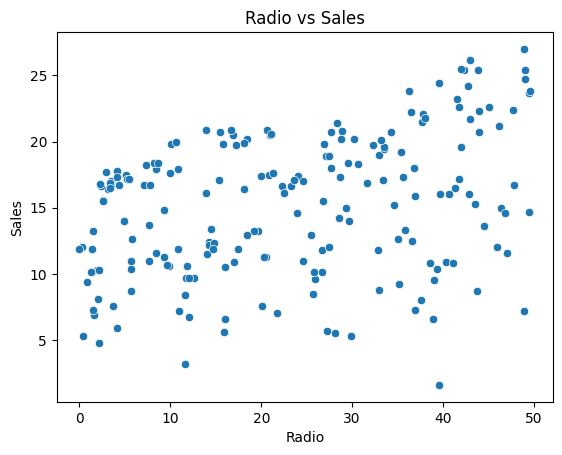

In [44]:
sns.scatterplot(x=advertising['Radio'], y=advertising['Sales'], data=advertising)
plt.title('Radio vs Sales')
plt.show()

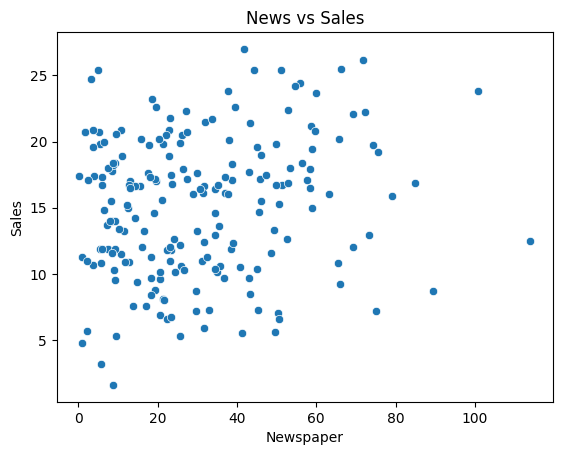

In [45]:
sns.scatterplot(x=advertising['Newspaper'], y=advertising['Sales'], data=advertising)
plt.title('News vs Sales')
plt.show()

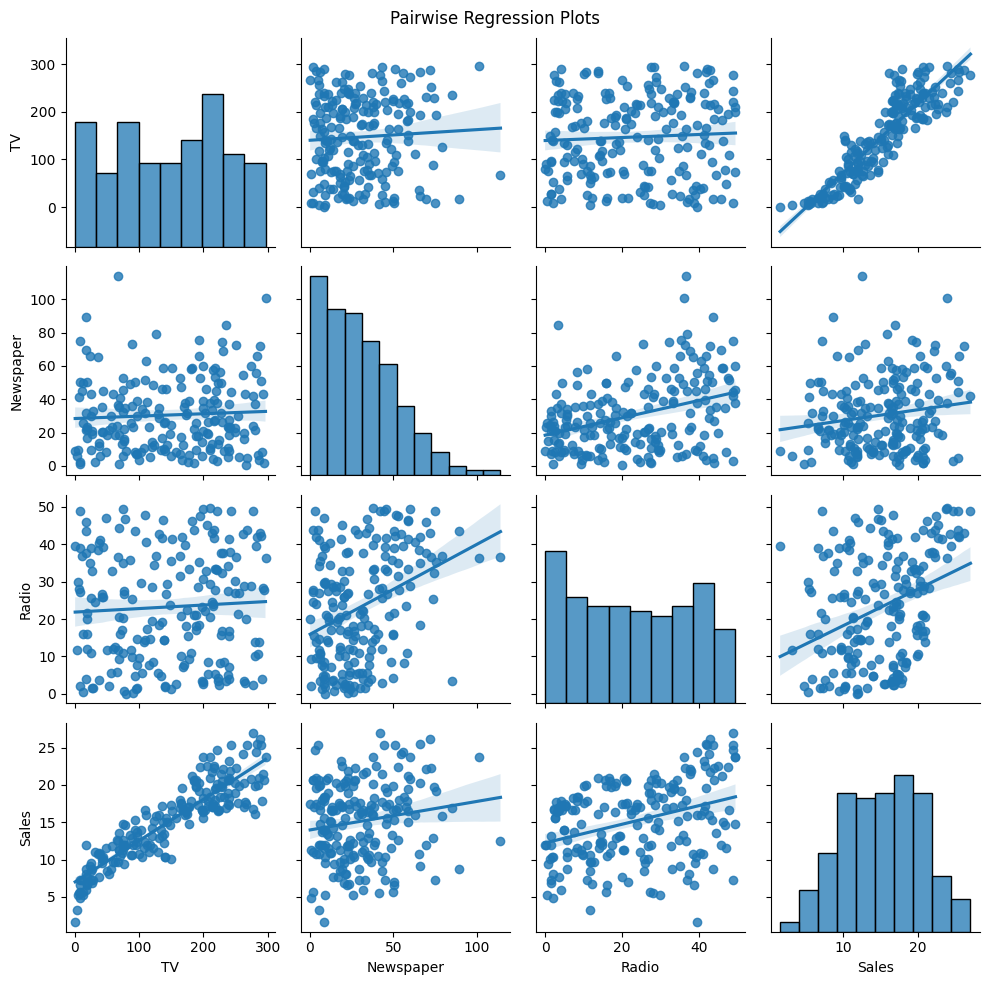

In [50]:
sns.pairplot(advertising, vars=['TV', 'Newspaper', 'Radio', 'Sales'], kind='reg')
plt.suptitle('Pairwise Regression Plots')
plt.tight_layout()
plt.show()

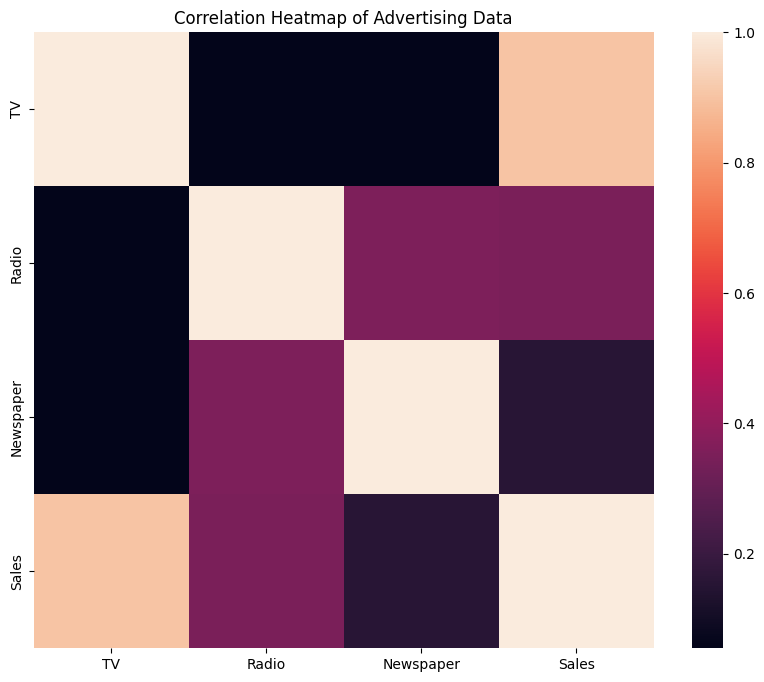

In [49]:

plt.figure(figsize=(10, 8))
sns.heatmap(advertising.corr())
plt.title('Correlation Heatmap of Advertising Data')
plt.show()

In [53]:
X=advertising['TV']
y=advertising['Sales']


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           5.08e-50
Time:                        14:30:08   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

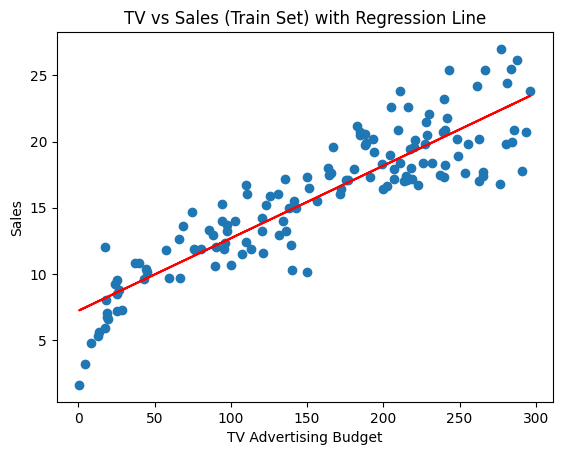

R-squared on test set: 0.814855389208679


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

# Predicting on the test set
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

# Plotting the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train_sm), 'r')
plt.title('TV vs Sales (Train Set) with Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

# Evaluating the model (optional)
from sklearn.metrics import r2_score
print(f"R-squared on test set: {r2_score(y_test, y_pred)}")

In [55]:
import statsmodels.api as sm

#using OLS = Ordinary Least Sqiares
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           5.08e-50
Time:                        14:34:30   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

In [56]:
# const is the intercept
# TV is the slow
lr.params

,0
const,7.206555
TV,0.054835


In [60]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

from sklearn.metrics import r2_score
print(f"R-squared on test set: {r2_score(y_test, y_pred)}")

R-squared on test set: 0.814855389208679
